In [66]:
import pandas as pd
import numpy as np
from kmodes.kmodes import KModes
import plotly.graph_objects as go
from sklearn.manifold import TSNE

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199

In [106]:
df = pd.read_csv(r"Data\kaggle-survey-DS-and-ML-2018\multipleChoiceResponses.csv" ,
                 low_memory= False )

In [107]:
cols = df.columns
print(cols)

other_text_cols = []
for col in cols:
    if "OTHER" in col or "TEXT" in col:
        other_text_cols.append(col)

print(other_text_cols)
        

Index(['Time from Start to Finish (seconds)', 'Q1', 'Q1_OTHER_TEXT', 'Q2',
       'Q3', 'Q4', 'Q5', 'Q6', 'Q6_OTHER_TEXT', 'Q7',
       ...
       'Q49_OTHER_TEXT', 'Q50_Part_1', 'Q50_Part_2', 'Q50_Part_3',
       'Q50_Part_4', 'Q50_Part_5', 'Q50_Part_6', 'Q50_Part_7', 'Q50_Part_8',
       'Q50_OTHER_TEXT'],
      dtype='object', length=395)
['Q1_OTHER_TEXT', 'Q6_OTHER_TEXT', 'Q7_OTHER_TEXT', 'Q11_OTHER_TEXT', 'Q12_Part_1_TEXT', 'Q12_Part_2_TEXT', 'Q12_Part_3_TEXT', 'Q12_Part_4_TEXT', 'Q12_Part_5_TEXT', 'Q12_OTHER_TEXT', 'Q13_OTHER_TEXT', 'Q14_OTHER_TEXT', 'Q15_OTHER_TEXT', 'Q16_OTHER_TEXT', 'Q17_OTHER_TEXT', 'Q18_OTHER_TEXT', 'Q19_OTHER_TEXT', 'Q20_OTHER_TEXT', 'Q21_OTHER_TEXT', 'Q22_OTHER_TEXT', 'Q27_OTHER_TEXT', 'Q28_OTHER_TEXT', 'Q29_OTHER_TEXT', 'Q30_OTHER_TEXT', 'Q31_OTHER_TEXT', 'Q32_OTHER', 'Q33_OTHER_TEXT', 'Q34_OTHER_TEXT', 'Q35_OTHER_TEXT', 'Q36_OTHER_TEXT', 'Q37_OTHER_TEXT', 'Q38_OTHER_TEXT', 'Q42_OTHER_TEXT', 'Q49_OTHER_TEXT', 'Q50_OTHER_TEXT']


In [108]:
df = df.drop(other_text_cols, axis = 1)

In [109]:
print(df.columns)
# print shape 
print(df.shape)
# Check the null values
print(df.isnull().sum().sort_values(ascending = False))

Index(['Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5',
       'Q6', 'Q7', 'Q8', 'Q9',
       ...
       'Q49_Part_11', 'Q49_Part_12', 'Q50_Part_1', 'Q50_Part_2', 'Q50_Part_3',
       'Q50_Part_4', 'Q50_Part_5', 'Q50_Part_6', 'Q50_Part_7', 'Q50_Part_8'],
      dtype='object', length=360)
(23860, 360)
Q38_Part_19                            23859
Q38_Part_20                            23859
Q28_Part_22                            23842
Q28_Part_24                            23828
Q29_Part_16                            23821
Q29_Part_25                            23806
Q29_Part_14                            23800
Q30_Part_15                            23798
Q29_Part_24                            23798
Q29_Part_23                            23793
Q30_Part_21                            23792
Q29_Part_17                            23788
Q30_Part_23                            23778
Q28_Part_18                            23775
Q28_Part_33                            23771
Q29

In [110]:
df1 =  df[pd.notnull(df['Q6'])]
print(df1.shape)
print(df1.isnull().sum().sort_values(ascending = False))


(22901, 360)

In [8]:
df.to_csv(r"Data\kaggle-survey-DS-and-ML-2018\MCR-without-other-text-py.csv" , index = False)

In [46]:
print(df.Q6.value_counts().index.tolist())
print(df.Q6.value_counts().tolist())

print(df.Q6.value_counts())
print("TOTAL = "+str(sum(df.Q6.value_counts().tolist())))

['Student', 'Data Scientist', 'Software Engineer', 'Data Analyst', 'Other', 'Research Scientist', 'Not employed', 'Consultant', 'Business Analyst', 'Data Engineer', 'Research Assistant', 'Manager', 'Product/Project Manager', 'Chief Officer', 'Statistician', 'DBA/Database Engineer', 'Developer Advocate', 'Marketing Analyst', 'Salesperson', 'Principal Investigator', 'Data Journalist', 'Select the title most similar to your current role (or most recent title if retired): - Selected Choice']
[5253, 4137, 3130, 1922, 1322, 1189, 842, 785, 772, 737, 600, 590, 428, 360, 237, 145, 117, 115, 102, 97, 20, 1]
Student                                                                                                    5253
Data Scientist                                                                                             4137
Software Engineer                                                                                          3130
Data Analyst                                              

In [10]:
#df1 =  df.dropna(thresh=df.shape[0]*0.8,how='all',axis=1)
#df1.shape

In [47]:
df1 = df1.iloc[ 1: , : ]
print(df1.shape)

(22900, 360)


In [48]:
df1.head(5)

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11_Part_1,Q11_Part_2,Q11_Part_3,Q11_Part_4,Q11_Part_5,Q11_Part_6,Q11_Part_7,Q12_MULTIPLE_CHOICE,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,Q13_Part_6,Q13_Part_7,Q13_Part_8,Q13_Part_9,Q13_Part_10,Q13_Part_11,Q13_Part_12,Q13_Part_13,Q13_Part_14,Q13_Part_15,Q14_Part_1,Q14_Part_2,Q14_Part_3,Q14_Part_4,Q14_Part_5,Q14_Part_6,Q14_Part_7,Q14_Part_8,Q14_Part_9,Q14_Part_10,Q14_Part_11,Q15_Part_1,Q15_Part_2,Q15_Part_3,Q15_Part_4,Q15_Part_5,Q15_Part_6,Q15_Part_7,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_Part_13,Q16_Part_14,Q16_Part_15,Q16_Part_16,Q16_Part_17,Q16_Part_18,Q17,Q18,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_Part_6,Q19_Part_7,Q19_Part_8,Q19_Part_9,Q19_Part_10,Q19_Part_11,Q19_Part_12,Q19_Part_13,Q19_Part_14,Q19_Part_15,Q19_Part_16,Q19_Part_17,Q19_Part_18,Q19_Part_19,Q20,Q21_Part_1,Q21_Part_2,Q21_Part_3,Q21_Part_4,Q21_Part_5,Q21_Part_6,Q21_Part_7,Q21_Part_8,Q21_Part_9,Q21_Part_10,Q21_Part_11,Q21_Part_12,Q21_Part_13,Q22,Q23,Q24,Q25,Q26,Q27_Part_1,Q27_Part_2,Q27_Part_3,Q27_Part_4,Q27_Part_5,Q27_Part_6,Q27_Part_7,Q27_Part_8,Q27_Part_9,Q27_Part_10,Q27_Part_11,Q27_Part_12,Q27_Part_13,Q27_Part_14,Q27_Part_15,Q27_Part_16,Q27_Part_17,Q27_Part_18,Q27_Part_19,Q27_Part_20,Q28_Part_1,Q28_Part_2,Q28_Part_3,Q28_Part_4,Q28_Part_5,Q28_Part_6,Q28_Part_7,Q28_Part_8,Q28_Part_9,Q28_Part_10,Q28_Part_11,Q28_Part_12,Q28_Part_13,Q28_Part_14,Q28_Part_15,Q28_Part_16,Q28_Part_17,Q28_Part_18,Q28_Part_19,Q28_Part_20,Q28_Part_21,Q28_Part_22,Q28_Part_23,Q28_Part_24,Q28_Part_25,Q28_Part_26,Q28_Part_27,Q28_Part_28,Q28_Part_29,Q28_Part_30,Q28_Part_31,Q28_Part_32,Q28_Part_33,Q28_Part_34,Q28_Part_35,Q28_Part_36,Q28_Part_37,Q28_Part_38,Q28_Part_39,Q28_Part_40,Q28_Part_41,Q28_Part_42,Q28_Part_43,Q29_Part_1,Q29_Part_2,Q29_Part_3,Q29_Part_4,Q29_Part_5,Q29_Part_6,Q29_Part_7,Q29_Part_8,Q29_Part_9,Q29_Part_10,Q29_Part_11,Q29_Part_12,Q29_Part_13,Q29_Part_14,Q29_Part_15,Q29_Part_16,Q29_Part_17,Q29_Part_18,Q29_Part_19,Q29_Part_20,Q29_Part_21,Q29_Part_22,Q29_Part_23,Q29_Part_24,Q29_Part_25,Q29_Part_26,Q29_Part_27,Q29_Part_28,Q30_Part_1,Q30_Part_2,Q30_Part_3,Q30_Part_4,Q30_Part_5,Q30_Part_6,Q30_Part_7,Q30_Part_8,Q30_Part_9,Q30_Part_10,Q30_Part_11,Q30_Part_12,Q30_Part_13,Q30_Part_14,Q30_Part_15,Q30_Part_16,Q30_Part_17,Q30_Part_18,Q30_Part_19,Q30_Part_20,Q30_Part_21,Q30_Part_22,Q30_Part_23,Q30_Part_24,Q30_Part_25,Q31_Part_1,Q31_Part_2,Q31_Part_3,Q31_Part_4,Q31_Part_5,Q31_Part_6,Q31_Part_7,Q31_Part_8,Q31_Part_9,Q31_Part_10,Q31_Part_11,Q31_Part_12,Q32,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q35_Part_1,Q35_Part_2,Q35_Part_3,Q35_Part_4,Q35_Part_5,Q35_Part_6,Q36_Part_1,Q36_Part_2,Q36_Part_3,Q36_Part_4,Q36_Part_5,Q36_Part_6,Q36_Part_7,Q36_Part_8,Q36_Part_9,Q36_Part_10,Q36_Part_11,Q36_Part_12,Q36_Part_13,Q37,Q38_Part_1,Q38_Part_2,Q38_Part_3,Q38_Part_4,Q38_Part_5,Q38_Part_6,Q38_Part_7,Q38_Part_8,Q38_Part_9,Q38_Part_10,Q38_Part_11,Q38_Part_12,Q38_Part_13,Q38_Part_14,Q38_Part_15,Q38_Part_16,Q38_Part_17,Q38_Part_18,Q38_Part_19,Q38_Part_20,Q38_Part_21,Q38_Part_22,Q39_Part_1,Q39_Part_2,Q40,Q41_Part_1,Q41_Part_2,Q41_Part_3,Q42_Part_1,Q42_Part_2,Q42_Part_3,Q42_Part_4,Q42_Part_5,Q43,Q44_Part_1,Q44_Part_2,Q44_Part_3,Q44_Part_4,Q44_Part_5,Q44_Part_6,Q45_Part_1,Q45_Part_2,Q45_Part_3,Q45_Part_4,Q45_Part_5,Q45_Part_6,Q46,Q47_Part_1,Q47_Part_2,Q47_Part_3,Q47_Part_4,Q47_Part_5,Q47_Part_6,Q47_Part_7,Q47_Part_8,Q47_Part_9,Q47_Part_10,Q47_Part_11,Q47_Part_12,Q47_Part_13,Q47_Part_14,Q47_Part_15,Q47_Part_16,Q48,Q49_Part_1,Q49_Part_2,Q49_Part_3,Q49_Part_4,Q49_Part_5,Q49_Part_6,Q49_Part_7,Q49_Part_8,Q49_Part_9,Q49_Part_10,Q49_Part_11,Q49_Part_12,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8
1,710,Female,45-49,United States of Ame

In [49]:
cols= df1.columns
cols = cols[1:]
for col in cols:
    print("\n")
    print(" ### Columne Name = "+ col )
    print(df1[col].value_counts())



 ### Columne Name = Q1
Male                       18668
Female                     3851 
Prefer not to say          303  
Prefer to self-describe    78   
Name: Q1, dtype: int64


 ### Columne Name = Q2
25-29    5917
22-24    4905
30-34    3645
18-21    2881
35-39    2175
40-44    1308
45-49    833 
50-54    562 
55-59    322 
60-69    269 
70-79    49  
80+      34  
Name: Q2, dtype: int64


 ### Columne Name = Q3
United States of America                                4584
India                                                   4250
China                                                   1503
Other                                                   992 
Russia                                                  835 
Germany                                                 717 
Brazil                                                  707 
United Kingdom of Great Britain and Northern Ireland    686 
Canada                                                  586 
France                        

Bokeh    1907
Name: Q21_Part_7, dtype: int64


 ### Columne Name = Q21_Part_8
Seaborn    7775
Name: Q21_Part_8, dtype: int64


 ### Columne Name = Q21_Part_9
Geoplotlib    768
Name: Q21_Part_9, dtype: int64


 ### Columne Name = Q21_Part_10
Leaflet    1013
Name: Q21_Part_10, dtype: int64


 ### Columne Name = Q21_Part_11
Lattice    872
Name: Q21_Part_11, dtype: int64


 ### Columne Name = Q21_Part_12
None    1921
Name: Q21_Part_12, dtype: int64


 ### Columne Name = Q21_Part_13
Other    585
Name: Q21_Part_13, dtype: int64


 ### Columne Name = Q22
Matplotlib    6707
ggplot2       2877
Seaborn       1334
Plotly        540 
D3            243 
Shiny         199 
Other         110 
Bokeh         77  
Leaflet       39  
Lattice       33  
Altair        16  
Geoplotlib    9   
Name: Q22, dtype: int64


 ### Columne Name = Q23
50% to 74% of my time    5539
25% to 49% of my time    5015
1% to 25% of my time     4197
75% to 99% of my time    2768
0% of my time            544 
100% of my time   

In [50]:
all_cols = df1.columns.tolist()
all_cols

['Time from Start to Finish (seconds)',
 'Q1',
 'Q2',
 'Q3',
 'Q4',
 'Q5',
 'Q6',
 'Q7',
 'Q8',
 'Q9',
 'Q10',
 'Q11_Part_1',
 'Q11_Part_2',
 'Q11_Part_3',
 'Q11_Part_4',
 'Q11_Part_5',
 'Q11_Part_6',
 'Q11_Part_7',
 'Q12_MULTIPLE_CHOICE',
 'Q13_Part_1',
 'Q13_Part_2',
 'Q13_Part_3',
 'Q13_Part_4',
 'Q13_Part_5',
 'Q13_Part_6',
 'Q13_Part_7',
 'Q13_Part_8',
 'Q13_Part_9',
 'Q13_Part_10',
 'Q13_Part_11',
 'Q13_Part_12',
 'Q13_Part_13',
 'Q13_Part_14',
 'Q13_Part_15',
 'Q14_Part_1',
 'Q14_Part_2',
 'Q14_Part_3',
 'Q14_Part_4',
 'Q14_Part_5',
 'Q14_Part_6',
 'Q14_Part_7',
 'Q14_Part_8',
 'Q14_Part_9',
 'Q14_Part_10',
 'Q14_Part_11',
 'Q15_Part_1',
 'Q15_Part_2',
 'Q15_Part_3',
 'Q15_Part_4',
 'Q15_Part_5',
 'Q15_Part_6',
 'Q15_Part_7',
 'Q16_Part_1',
 'Q16_Part_2',
 'Q16_Part_3',
 'Q16_Part_4',
 'Q16_Part_5',
 'Q16_Part_6',
 'Q16_Part_7',
 'Q16_Part_8',
 'Q16_Part_9',
 'Q16_Part_10',
 'Q16_Part_11',
 'Q16_Part_12',
 'Q16_Part_13',
 'Q16_Part_14',
 'Q16_Part_15',
 'Q16_Part_16',
 'Q16_Part

In [51]:
not_part_col = []
part_col = []

for col in all_cols:
    if "Part" in col:
        part_col.append(col)
    else:
        not_part_col.append(col)
        
print("COlumns with parts = ")
print(part_col)
print("Columns without parts = ")
print(not_part_col)
    

COlumns with parts = 
['Q11_Part_1', 'Q11_Part_2', 'Q11_Part_3', 'Q11_Part_4', 'Q11_Part_5', 'Q11_Part_6', 'Q11_Part_7', 'Q13_Part_1', 'Q13_Part_2', 'Q13_Part_3', 'Q13_Part_4', 'Q13_Part_5', 'Q13_Part_6', 'Q13_Part_7', 'Q13_Part_8', 'Q13_Part_9', 'Q13_Part_10', 'Q13_Part_11', 'Q13_Part_12', 'Q13_Part_13', 'Q13_Part_14', 'Q13_Part_15', 'Q14_Part_1', 'Q14_Part_2', 'Q14_Part_3', 'Q14_Part_4', 'Q14_Part_5', 'Q14_Part_6', 'Q14_Part_7', 'Q14_Part_8', 'Q14_Part_9', 'Q14_Part_10', 'Q14_Part_11', 'Q15_Part_1', 'Q15_Part_2', 'Q15_Part_3', 'Q15_Part_4', 'Q15_Part_5', 'Q15_Part_6', 'Q15_Part_7', 'Q16_Part_1', 'Q16_Part_2', 'Q16_Part_3', 'Q16_Part_4', 'Q16_Part_5', 'Q16_Part_6', 'Q16_Part_7', 'Q16_Part_8', 'Q16_Part_9', 'Q16_Part_10', 'Q16_Part_11', 'Q16_Part_12', 'Q16_Part_13', 'Q16_Part_14', 'Q16_Part_15', 'Q16_Part_16', 'Q16_Part_17', 'Q16_Part_18', 'Q19_Part_1', 'Q19_Part_2', 'Q19_Part_3', 'Q19_Part_4', 'Q19_Part_5', 'Q19_Part_6', 'Q19_Part_7', 'Q19_Part_8', 'Q19_Part_9', 'Q19_Part_10', 'Q19_Pa

In [52]:
df_not_parts = df1[not_part_col]
print(df_not_parts.shape)
print(df_not_parts.head(5))

(22900, 26)
(22900, 334)


In [103]:
df_parts = df1[part_col]
print(df_parts.shape)
print(df_parts.head(5))

(22900, 334)
                                                               Q11_Part_1  \
1  Analyze and understand data to influence product or business decisions   
2  NaN                                                                      
3  Analyze and understand data to influence product or business decisions   
4  NaN                                                                      
5  NaN                                                                      

                                                                                        Q11_Part_2  \
1  Build and/or run a machine learning service that operationally improves my product or workflows   
2  NaN                                                                                               
3  NaN                                                                                               
4  NaN                                                                                               
5  NaN        

In [ ]:
# change all blank fields to 0 and string fields to 1
#df_parts = df_parts.replace(np.nan, '0', regex=True)
#df.loc[df["Count"] < 2000, 'Name'] = "Other"


In [102]:
def check_str_len(x):
    if 'NaN' in x and len(x) == 3:
        return 0
    else:
        return 1

for col in part_col:
    print("Working on...    "+col)
    #df_parts[[col] = df_parts[[col].applymap(str)
    df_parts[col] = df_parts[col].apply( lambda x : check_str_len(str(x)) )
    print(df_parts[col].head(10))


Working on...    Q11_Part_1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
Name: Q11_Part_1, dtype: int64
Working on...    Q11_Part_2
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
Name: Q11_Part_2, dtype: int64
Working on...    Q11_Part_3
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
Name: Q11_Part_3, dtype: int64
Working on...    Q11_Part_4


C:\Users\Adarsh\.conda\envs\msr-project\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
Name: Q11_Part_4, dtype: int64
Working on...    Q11_Part_5
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
Name: Q11_Part_5, dtype: int64
Working on...    Q11_Part_6
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
Name: Q11_Part_6, dtype: int64
Working on...    Q11_Part_7
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
Name: Q11_Part_7, dtype: int64
Working on...    Q13_Part_1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
Name: Q13_Part_1, dtype: int64
Working on...    Q13_Part_2
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
Name: Q13_Part_2, dtype: int64
Working on...    Q13_Part_3
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
Name: Q13_Part_3, dtype: int64
Working on...    Q13_Part_4
1     1
2     1
3     1
4  

1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
Name: Q19_Part_6, dtype: int64
Working on...    Q19_Part_7
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
Name: Q19_Part_7, dtype: int64
Working on...    Q19_Part_8
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
Name: Q19_Part_8, dtype: int64
Working on...    Q19_Part_9
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
Name: Q19_Part_9, dtype: int64
Working on...    Q19_Part_10
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
Name: Q19_Part_10, dtype: int64
Working on...    Q19_Part_11
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
Name: Q19_Part_11, dtype: int64
Working on...    Q19_Part_12
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
Name: Q19_Part_12, dtype: int64
Working on...    Q19_Part_13
1     1
2     1
3   

Name: Q28_Part_14, dtype: int64
Working on...    Q28_Part_15
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
Name: Q28_Part_15, dtype: int64
Working on...    Q28_Part_16
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
Name: Q28_Part_16, dtype: int64
Working on...    Q28_Part_17
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
Name: Q28_Part_17, dtype: int64
Working on...    Q28_Part_18
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
Name: Q28_Part_18, dtype: int64
Working on...    Q28_Part_19
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
Name: Q28_Part_19, dtype: int64
Working on...    Q28_Part_20
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
Name: Q28_Part_20, dtype: int64
Working on...    Q28_Part_21
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
Name: Q28_Par

Working on...    Q30_Part_4
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
Name: Q30_Part_4, dtype: int64
Working on...    Q30_Part_5
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
Name: Q30_Part_5, dtype: int64
Working on...    Q30_Part_6
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
Name: Q30_Part_6, dtype: int64
Working on...    Q30_Part_7
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
Name: Q30_Part_7, dtype: int64
Working on...    Q30_Part_8
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
Name: Q30_Part_8, dtype: int64
Working on...    Q30_Part_9
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
Name: Q30_Part_9, dtype: int64
Working on...    Q30_Part_10
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
Name: Q30_Part_10, dtype: int64
Working on...    Q30_Part

1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
Name: Q36_Part_5, dtype: int64
Working on...    Q36_Part_6
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
Name: Q36_Part_6, dtype: int64
Working on...    Q36_Part_7
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
Name: Q36_Part_7, dtype: int64
Working on...    Q36_Part_8
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
Name: Q36_Part_8, dtype: int64
Working on...    Q36_Part_9
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
Name: Q36_Part_9, dtype: int64
Working on...    Q36_Part_10
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
Name: Q36_Part_10, dtype: int64
Working on...    Q36_Part_11
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
Name: Q36_Part_11, dtype: int64
Working on...    Q36_Part_12
1     1
2     1
3     

1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
Name: Q47_Part_7, dtype: int64
Working on...    Q47_Part_8
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
Name: Q47_Part_8, dtype: int64
Working on...    Q47_Part_9
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
Name: Q47_Part_9, dtype: int64
Working on...    Q47_Part_10
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
Name: Q47_Part_10, dtype: int64
Working on...    Q47_Part_11
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
Name: Q47_Part_11, dtype: int64
Working on...    Q47_Part_12
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
Name: Q47_Part_12, dtype: int64
Working on...    Q47_Part_13
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
Name: Q47_Part_13, dtype: int64
Working on...    Q47_Part_14
1     1
2     1
3 

In [54]:
df_not_parts =  df_not_parts.iloc[ 1:, : ]
for col in not_part_col[1:]:
    print("\n")
    print(" ### Columne Name = "+ col )
    print(df_not_parts[col].value_counts())



 ### Columne Name = Q1
Male                       18668
Female                     3850 
Prefer not to say          303  
Prefer to self-describe    78   
Name: Q1, dtype: int64


 ### Columne Name = Q2
25-29    5917
22-24    4905
30-34    3645
18-21    2881
35-39    2175
40-44    1308
45-49    832 
50-54    562 
55-59    322 
60-69    269 
70-79    49  
80+      34  
Name: Q2, dtype: int64


 ### Columne Name = Q3
United States of America                                4583
India                                                   4250
China                                                   1503
Other                                                   992 
Russia                                                  835 
Germany                                                 717 
Brazil                                                  707 
United Kingdom of Great Britain and Northern Ireland    686 
Canada                                                  586 
France                        

In [55]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
labels = LE.fit_transform(df_not_parts['Q6'].astype(str))

print(labels)
print(labels.shape)


[12  7 11 ..., 15  1 18]
(22899,)


In [56]:
df_not_parts.drop(['Q6'], axis = 1, inplace =True )

In [57]:
df_not_parts.columns

Index(['Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5',
       'Q7', 'Q8', 'Q9', 'Q10', 'Q12_MULTIPLE_CHOICE', 'Q17', 'Q18', 'Q20',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q32', 'Q37', 'Q40', 'Q43', 'Q46',
       'Q48'],
      dtype='object')

In [58]:

# create one hot encoding for all the categories
not_part_col.remove('Q6')

for col in not_part_col[1:]:
    print("Processing...     "+col)
    # Get one hot encoding of columns columns
    one_hot = pd.get_dummies(df_not_parts[col])
    one_hot = (pd.get_dummies(df_not_parts[col], prefix='', prefix_sep='')
                   .max(level=0, axis=1)
                   .add_prefix(col+'-'))  
    # Drop column that column as it is now encoded
    df_not_parts = df_not_parts.drop(col,axis = 1)
    # Join the encoded df
    df_not_parts = df_not_parts.join(one_hot)
    print( "Columns = " )
    print(df_not_parts.columns)



Processing...     Q1
Columns = 
Index(['Time from Start to Finish (seconds)', 'Q2', 'Q3', 'Q4', 'Q5', 'Q7',
       'Q8', 'Q9', 'Q10', 'Q12_MULTIPLE_CHOICE', 'Q17', 'Q18', 'Q20', 'Q22',
       'Q23', 'Q24', 'Q25', 'Q26', 'Q32', 'Q37', 'Q40', 'Q43', 'Q46', 'Q48',
       'Q1-Female', 'Q1-Male', 'Q1-Prefer not to say',
       'Q1-Prefer to self-describe'],
      dtype='object')
Processing...     Q2
Columns = 
Index(['Time from Start to Finish (seconds)', 'Q3', 'Q4', 'Q5', 'Q7', 'Q8',
       'Q9', 'Q10', 'Q12_MULTIPLE_CHOICE', 'Q17', 'Q18', 'Q20', 'Q22', 'Q23',
       'Q24', 'Q25', 'Q26', 'Q32', 'Q37', 'Q40', 'Q43', 'Q46', 'Q48',
       'Q1-Female', 'Q1-Male', 'Q1-Prefer not to say',
       'Q1-Prefer to self-describe', 'Q2-18-21', 'Q2-22-24', 'Q2-25-29',
       'Q2-30-34', 'Q2-35-39', 'Q2-40-44', 'Q2-45-49', 'Q2-50-54', 'Q2-55-59',
       'Q2-60-69', 'Q2-70-79', 'Q2-80+'],
      dtype='object')
Processing...     Q3
Columns = 
Index(['Time from Start to Finish (seconds)', 'Q4', 'Q5', 'Q7', 

Columns = 
Index(['Time from Start to Finish (seconds)', 'Q24', 'Q25', 'Q26', 'Q32',
       'Q37', 'Q40', 'Q43', 'Q46', 'Q48',
       ...
       'Q22-Plotly', 'Q22-Seaborn', 'Q22-Shiny', 'Q22-ggplot2',
       'Q23-0% of my time', 'Q23-1% to 25% of my time', 'Q23-100% of my time',
       'Q23-25% to 49% of my time', 'Q23-50% to 74% of my time',
       'Q23-75% to 99% of my time'],
      dtype='object', length=231)
Processing...     Q24
Columns = 
Index(['Time from Start to Finish (seconds)', 'Q25', 'Q26', 'Q32', 'Q37',
       'Q40', 'Q43', 'Q46', 'Q48', 'Q1-Female',
       ...
       'Q24-1-2 years', 'Q24-10-20 years', 'Q24-20-30 years', 'Q24-3-5 years',
       'Q24-30-40 years', 'Q24-40+ years', 'Q24-5-10 years', 'Q24-< 1 year',
       'Q24-I have never written code and I do not want to learn',
       'Q24-I have never written code but I want to learn'],
      dtype='object', length=240)
Processing...     Q25
Columns = 
Index(['Time from Start to Finish (seconds)', 'Q26', 'Q32', 'Q37',

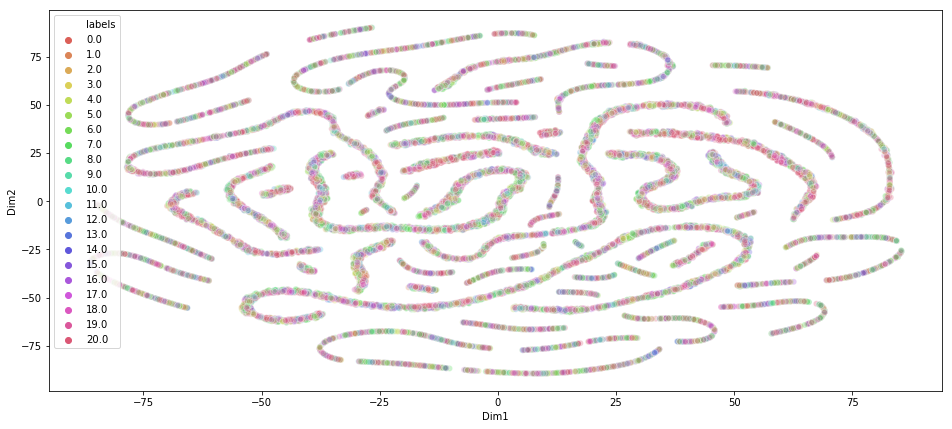

In [69]:
tsne_model = TSNE(n_components=2, random_state = 0, perplexity = 150, n_iter = 5000).fit_transform(df_not_parts)
tsne_data = np.vstack( ( tsne_model.T, labels ) ).T
tsne_df = pd.DataFrame( data= tsne_data, columns= ("Dim1", "Dim2", "labels" ) )
#sn.FaceGrid( tsne_df, hue = "label" , size = 6  ).map(plt.scatter, 'Dim1' , 'Dim2')
#plt.show(tsne_df ).map(plt.scatter, 'Dim1' , 'Dim2')

plt.figure(figsize=(16,7))
sns.scatterplot(
    x="Dim1", y="Dim2",
    hue="labels",
    palette=sns.color_palette("hls", 21),
    data=tsne_df,
    legend="full",
    alpha=0.3
)


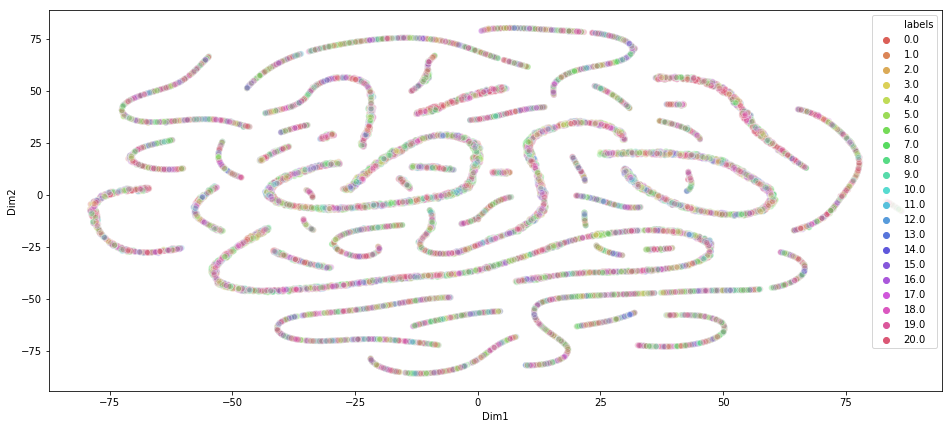

In [70]:
tsne_model = TSNE(n_components=2, random_state = 0, perplexity = 50 ).fit_transform(df_not_parts)
#tsne_data = tsne_model.fit_transform(df_not_parts)
tsne_data = np.vstack( ( tsne_model.T, labels ) ).T
tsne_df = pd.DataFrame( data= tsne_data, columns= ("Dim1", "Dim2", "labels" ) )
#sn.FaceGrid( tsne_df, hue = "label" , size = 6  ).map(plt.scatter, 'Dim1' , 'Dim2')
#plt.show(tsne_df ).map(plt.scatter, 'Dim1' , 'Dim2')

plt.figure(figsize=(16,7))
sns.scatterplot(
    x="Dim1", y="Dim2",
    hue="labels",
    palette=sns.color_palette("hls", 21),
    data=tsne_df,
    legend="full",
    alpha=0.3
)


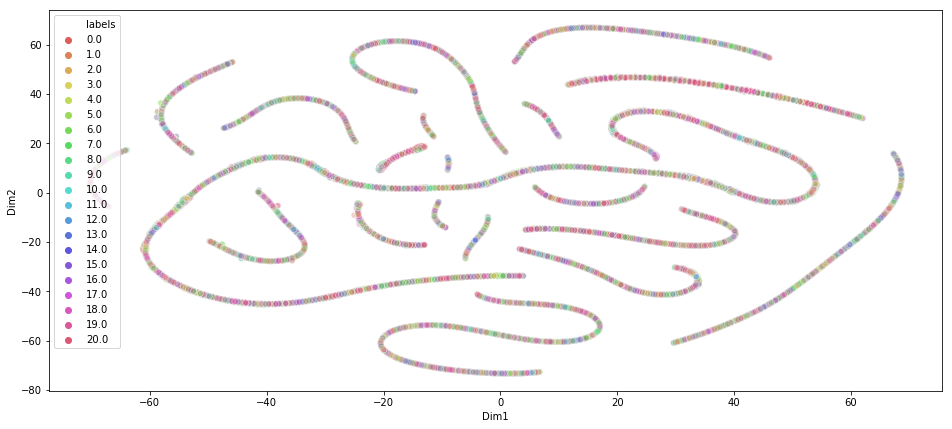

In [71]:
tsne_model = TSNE(n_components=2, random_state = 0, perplexity = 100 ).fit_transform(df_not_parts)
#tsne_data = tsne_model.fit_transform(df_not_parts)
tsne_data = np.vstack( ( tsne_model.T, labels ) ).T
tsne_df = pd.DataFrame( data= tsne_data, columns= ("Dim1", "Dim2", "labels" ) )
#sn.FaceGrid( tsne_df, hue = "label" , size = 6  ).map(plt.scatter, 'Dim1' , 'Dim2')
#plt.show(tsne_df ).map(plt.scatter, 'Dim1' , 'Dim2')

plt.figure(figsize=(16,7))
sns.scatterplot(
    x="Dim1", y="Dim2",
    hue="labels",
    palette=sns.color_palette("hls", 21),
    data=tsne_df,
    legend="full",
    alpha=0.3
)
